In [1]:
# import packages
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, shape
import fiona
fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'

import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
eircode_gdf = gpd.read_file('Data/Shapefiles/RoutingKeys.kml')
# putting the columns into lower case
eircode_gdf.columns = eircode_gdf.columns.str.lower()
# renaming columns
eircode_gdf = eircode_gdf[['name', 'description', 'geometry']]
# renaming columns
eircode_gdf = eircode_gdf.rename(columns={"name": "eircode_name",
                                          "description": "eircode_description"})

eircode_gdf.head(1).transpose()

,0
eircode_name,A45
eircode_description,OLDTOWN
geometry,"POLYGON Z ((-6.3663051 53.526173 0, -6.366247 ..."


<AxesSubplot:>

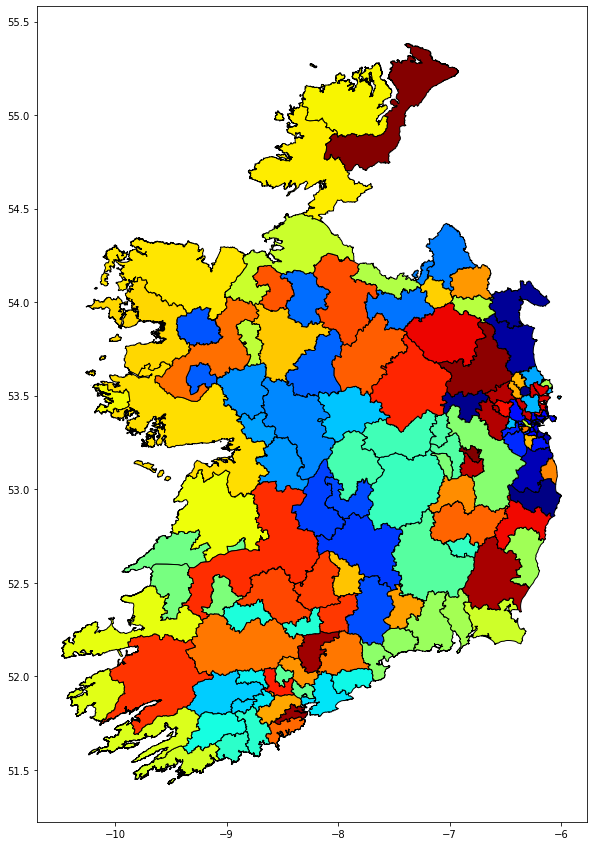

In [3]:
fig,ax = plt.subplots(figsize = (15,15))
eircode_gdf.plot(ax = ax, cmap = 'jet', edgecolor = 'black')

In [4]:
area_eircode_gdf = eircode_gdf.to_crs({'init' :'epsg:2157'})
area_eircode_gdf.crs

C:\Users\Karina\miniconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Derived Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

##### Area Eircode

In [5]:
for i in range(len(area_eircode_gdf)):
    area_eircode_gdf.loc[i,'area_in_m2'] = shape(area_eircode_gdf.loc[i,'geometry']).area
    
area_eircode_gdf['area_in_km2'] = area_eircode_gdf['area_in_m2'] /1000000
eircode_gdf['area_in_km2_eircode'] = area_eircode_gdf['area_in_km2']

eircode_gdf.head(1).transpose()

,0
eircode_name,A45
eircode_description,OLDTOWN
geometry,"POLYGON Z ((-6.3663051 53.526173 0, -6.366247 ..."
area_in_km2_eircode,28.79241


### Save

In [6]:
eircode_gdf.to_file('Data/Shapefiles/clean_eircode_gdf.geojson', index=False)